# Network function: 

$$y= \sigma(\sigma(\vec{x}^TW_1)\vec{w}_2)$$

# Network function in Sum Squared Error Function:


$$ loss = \sum_{i}\frac{1}{2}(\vec{y}_{i}-\sigma(\sigma(\vec{x}_{i}^T(W_{1})\vec{w}_{2}))^2$$

In [5]:
###Single variable gradient descent 

import numpy as np 

def function(x,derive = False):
    if derive: 
        return 2*x
    return x**2

learning_rate = 0.1
weight = 3 

for training_step in range(20):
    print(function(weight))
    weight = weight - learning_rate * function(weight,True)

9
5.76
3.6864
2.359296
1.5099494400000002
0.9663676416000002
0.6184752906240002
0.3958241859993601
0.25332747903959046
0.1621295865853379
0.10376293541461626
0.06640827866535441
0.042501298345826825
0.027200830941329163
0.017408531802450666
0.011141460353568427
0.007130534626283792
0.004563542160821628
0.0029206669829258416
0.0018692268690725384


<IPython.core.display.Javascript object>


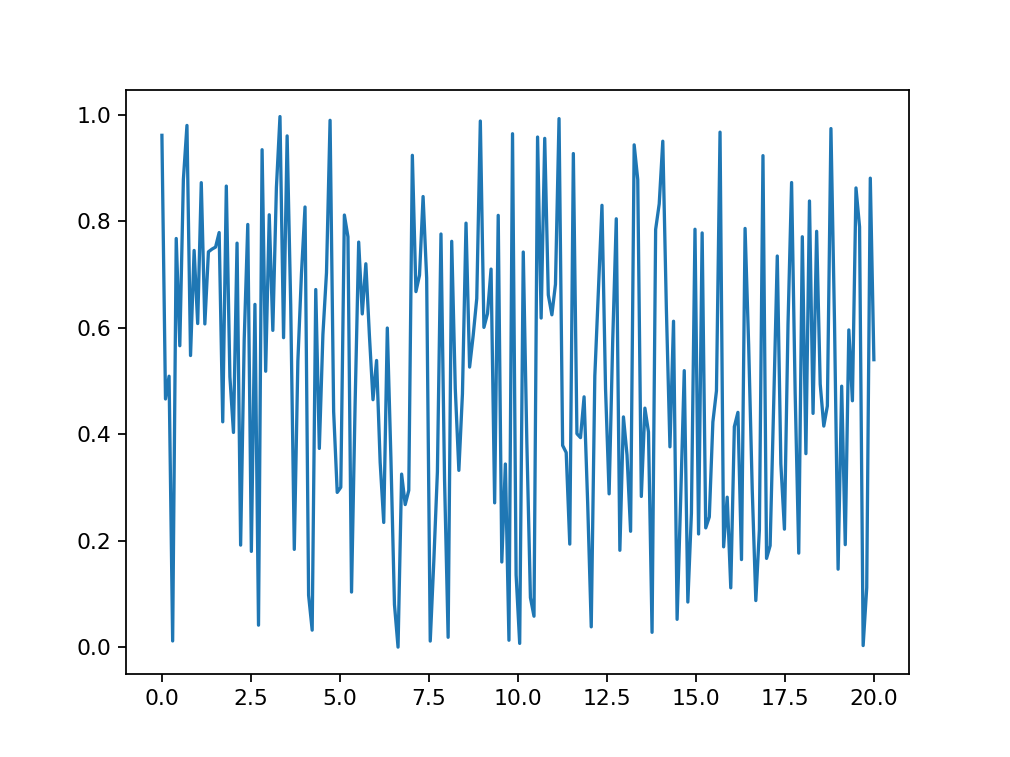

In [12]:
### Updating a plot in a loop 
import numpy as np
import matplotlib.pyplot as plt 
from time import sleep 
%matplotlib notebook 

fig,ax = plt.subplots()

x = np.linspace(0,20,200)
for step in range(20):
    ax.cla() #clear plot
    ax.plot(x,np.random.rand(x.shape[0]))
    fig.canvas.draw() #update plot
    sleep(0.5)

<IPython.core.display.Javascript object>


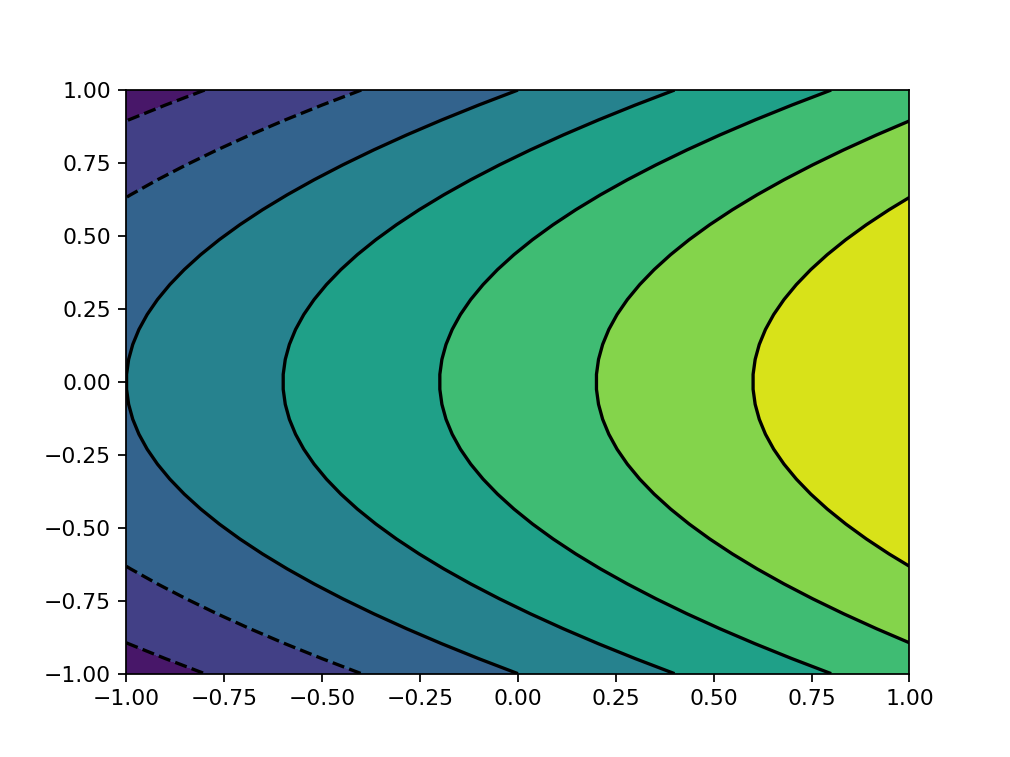

In [13]:
### Creating comtour plots

import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib notebook

fix,ax = plt.subplots()
x = np.linspace(-1,1,40)
y = np.linspace(-1,1,40)
X,Y = np.meshgrid(x,y)
Z = X**1 - Y**2 + 1

#plot contour
cp = ax.contourf(X,Y,Z,cmap = "viridis")
#plot contour lines
ax.contour(X,Y,Z,colors = "black", linestyle = "dashed")
fig.colorbar(cp) #add color-bar to figure

<IPython.core.display.Javascript object>


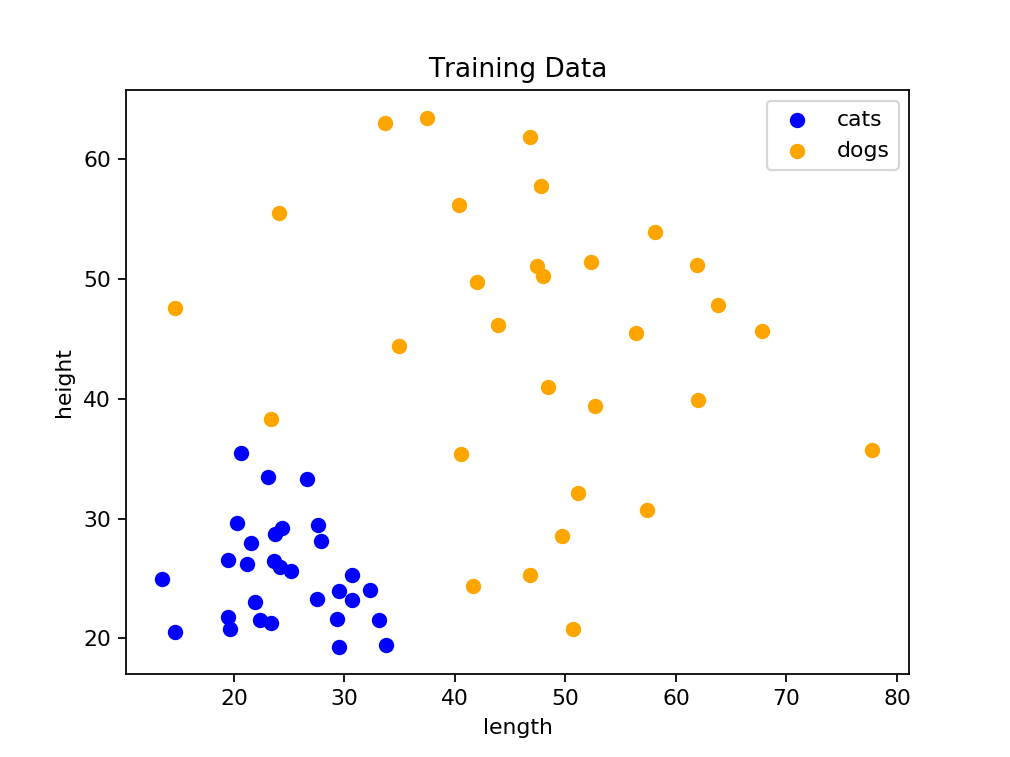

<IPython.core.display.Javascript object>


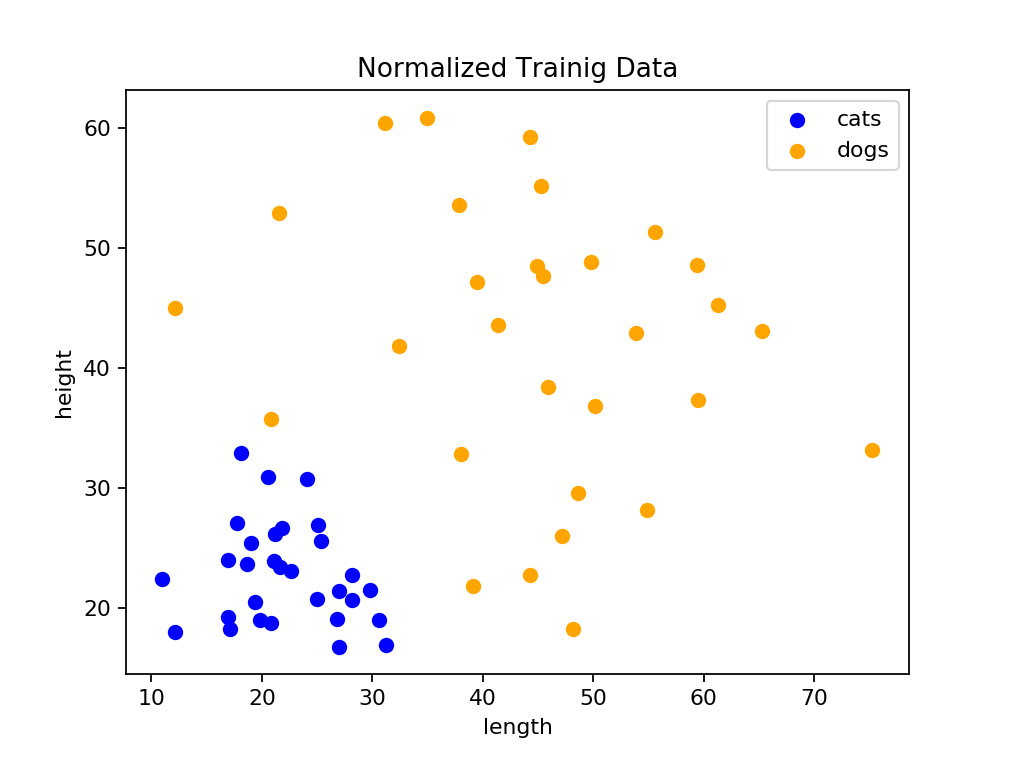

In [96]:
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib notebook

sample_size = 30 

np.random.seed(1)
cats = np.random.normal(25,5,(2,sample_size))
dogs = np.random.normal(45,15,(2,sample_size))

    #plotting
def plot(cats,dogs,title):
    plt.figure()
    plt.title(title)
    plt.scatter(cats[0],cats[1],color='blue',label='cats')
    plt.scatter(dogs[0],dogs[1],color='orange',label='dogs')
    plt.xlabel('length')
    plt.ylabel('height')
    plt.legend()


plot(cats,dogs,'Training Data')

cats_and_dogs = np.append(dogs,cats)

#normalize data by substracting the mean and dividing by the standard-deviation
norm_cats = (cats-np.mean(cats_and_dogs)/np.std(cats_and_dogs))
norm_dogs = (dogs-np.mean(cats_and_dogs)/np.std(cats_and_dogs))

plot(norm_cats,norm_dogs,'Normalized Trainig Data')



In [116]:
###Imports###
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib notebook

In [117]:
cats_and_dogs = np.concatenate([cats, dogs], axis = 1)
#zeros for the cats, ones for the dogs
labels = np.array([[0] * sample_size + [1] * sample_size]).T



def logistic_function(x, derivative = False):
    x = np.array(x.copy())
    if not derivative:
        return 1 / (1 + np.exp(-x))
    else:
        sigma = logistic_function(x)
        return sigma*(1-sigma)

# Forwardpropagation

In [118]:
def propagate(x, y_hat, weights, loss = True, gradient = True):
    x = np.array([x.copy()]) if x.ndim == 1 else x.copy()
    weights = np.array([weights.copy()]) if weights.ndim == 1 else weights.copy()
    
    drive = np.dot(x.T, weights)
    y = logistic_function(drive)
    
    if loss:
        loss = sum_squared_error(y_hat, y)
    
    if gradient:
        gradient = x.T * (y_hat - y)*(-logistic_function(drive, derivative = True))
        gradient = np.sum(gradient, axis = 0, keepdims = True).T
    
    return y, loss, gradient

# Sum Squared Error Function

In [119]:
def sum_squared_error(y_hat, y):
    return np.sum(0.5*(y_hat - y)**2)

# Gradient Descent

In [120]:
def error_surface(x, y_hat):
    weight_range_1 = np.linspace(-4, 4, 75)
    weight_range_2 = np.linspace(-4, 4, 75)
    
    surface = np.zeros((len(weight_range_1), len(weight_range_2)))
    
    for i, weight_1 in enumerate(weight_range_1):
        for n, weight_2 in enumerate(weight_range_2):
            _, surface[i, n], _ = propagate(x, y_hat, np.array([[weight_1, weight_2]]).T, gradient = False)
    
    return weight_range_1, weight_range_2, surface

## Deciding which kind of batch type to use

In [121]:
batch_type = "mini-batch" # "stochastic", "batch", "mini-batch"
training_steps = 50

# Momentum settings
momentum = False
beta = 1
last_gradient = np.array([[0, 0]]).T

<IPython.core.display.Javascript object>


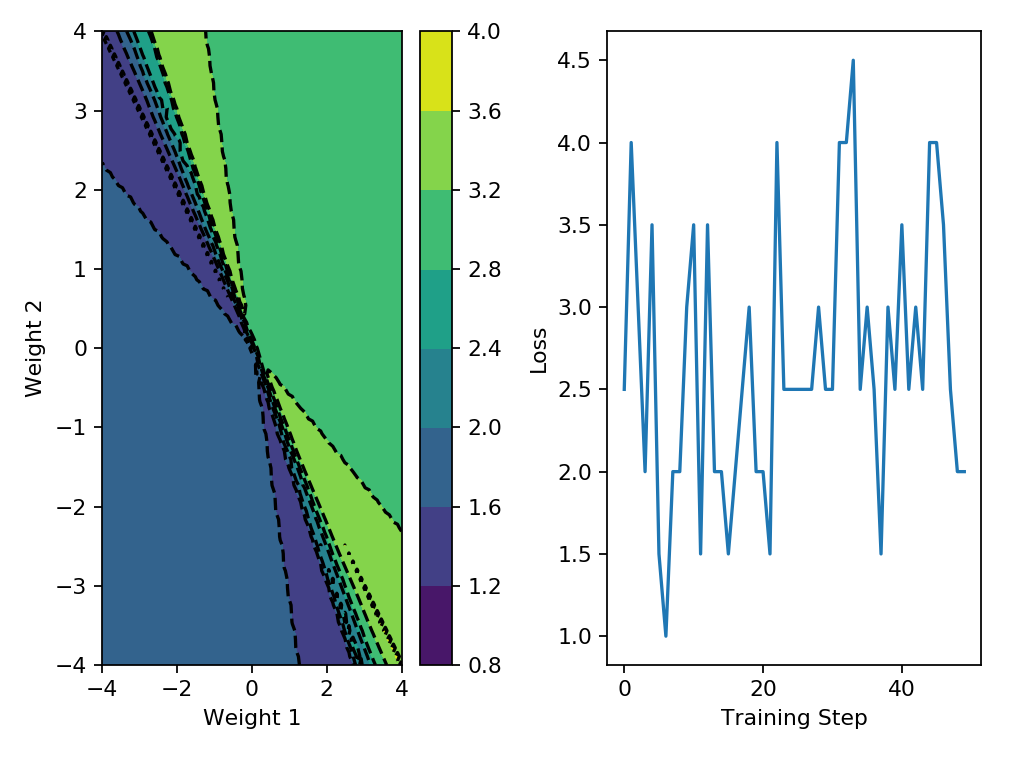

In [123]:
# Init weights
weights = np.array([[-2.5, -2.5]]).T

# Plot buffers
losses = np.zeros(training_steps)
weights_history = np.zeros((training_steps, 2))

fig, axs = plt.subplots(1, 2)

for training_step in range(training_steps):
    if batch_type == "batch":
        random_indices = range(sample_size * 2)
        learning_rate = 0.1
    elif batch_type == "mini-batch":
        mini_batch_size = 10
        random_indices = np.random.choice(sample_size * 2, mini_batch_size, replace = False)
        learning_rate = 0.5
    elif batch_type == "stochastic":
        random_indices = np.random.choice(sample_size * 2, 1, replace = False)
        learning_rate = 2.5
    
    # Create batch
    batch = cats_and_dogs[:, random_indices]
    batch_labels = labels[random_indices]
    
    # Forward- and backpropagate
    y, losses[training_step], gradient = propagate(batch, batch_labels, weights)
    
    # Create surface plot
    X, Y, surface = error_surface(batch, batch_labels)
    
    ax = axs[0]
    ax.cla()
    cp = ax.contourf(X, Y, surface, cmap = "viridis")
    ax.contour(X, Y, surface, colors = "black", linestyles = "dashed")
    if training_step == 0:
        plt.sca(ax)
        plt.colorbar(cp)
    
    ax.set_xlabel('Weight 1')
    ax.set_ylabel('Weight 2')
    
    ax.plot(weights_history[:training_step, 0], weights_history[:training_step, 1], 'w-')
    
    # Plot loss
    ax = axs[1]
    ax.cla()
    ax.plot(losses)
    ax.set_xlabel('Training Step')
    ax.set_ylabel('Loss')
    
    fig.canvas.draw()
    if training_step == 0:
        fig.tight_layout()
    
    # Update weights
    weights_history[training_step, :] = weights[:,0]
    if not momentum:
        weights -= learning_rate * gradient
    else:
        weights -= (beta * last_gradient) + (learning_rate * gradient)
        last_gradient = gradient
    
    sleep(0.2)